# Step-by-step approach to training a DeepNeuralNetwork for ImageClassification

We'll be working with Keras, a deep learning library, to implement a deep Convolutional Neural Network taking the CIFAR - 100 Dataset, hoping to achieve test accuracy of more than 65%, gradually moving from basic elements to advanced elements, observing the training procedure throughout.

In [ ]:
import numpy as np
import keras

Using TensorFlow backend.


# Understanding the CIFAR - 100 Dataset
CIFAR - 100 Dataset contains 60000 coloured images of dimensions 32x32, each labelled to one of the 100 classes that all of them belong to. The dataset is provided in the Keras library itself.

In [ ]:
from keras.datasets import cifar100


Using the load_data(), the dataset is divided into training and testing data function, that shall be used to evaluate our model.

In [ ]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.cifar100.load_data()

169009152/169001437 [==============================] - 6s 0us/step


We shall also define variables, num_label_classes defining the number of label classes and input_shape indicating the input 3-D Array

In [ ]:
num_label_classes = 100
input_image_shape = [32,32,3]

Let's look at how the divison of data takes place using this function

In [ ]:
print("The number of images available for training and validation are: " + str(train_images.shape[0]))
print("while, the number of images for testing are: " + str(test_images.shape[0]))

The number of images available for training and validation are: 50000
while, the number of images for testing are: 10000


So, let us now look at a few examples from the training dataset

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


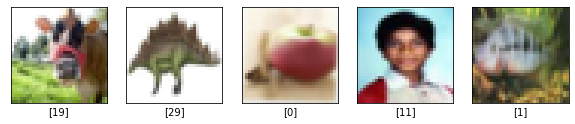

In [ ]:
import matplotlib.pyplot as plt     #importing the graphing library

plt.figure(figsize=(10,2))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(32, 32,3), cmap=plt.cm.RdYlBu)
    plt.xlabel(train_labels[i])

#Dataset Preprocessing
Our objective shall be to transform the input images into a 3D array giving the illusion of a normal distribution ie zero mean and unit standard deviation.

In [ ]:
#Converting the array elements to float datatype
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

In [ ]:
mean = np.mean (train_images, axis=(0, 1, 2, 3))
std = np.std (train_images, axis=(0, 1, 2, 3))

In [ ]:
#Performing the mathematical formula throughout the arrays
train_images = (train_images-mean)/(std+1e-7)
test_images = (test_images-mean)/(std+1e-7)

We shall also change the categorical labels to one-hot-encoding, so as to calculate loss easily. 


*Eg: a label of 12 shall have value of 1 for the twelfth position of array of labels while rest of the array elements will be zero.*

In [ ]:
train_labels = keras.utils.to_categorical(train_labels, num_label_classes)
test_labels = keras.utils.to_categorical(test_labels, num_label_classes)

# Creating the VGG-16 Neural Network

We shall be forming our deep CNN through the Sequential() model provided by Keras, this shall involve an API for a number of layers :

*   ***Conv2D*** : provides a convolution layer with defined size and stride

*   ***MaxPooling2D*** : forms Layer B by downsampling Layer A, taking the maximum value over the window defined by pool_size for each dimension along the features axis. 

*   ***BatchNormalization*** : Normalize the activations of the Layer A at each batch, i.e. applies a transformation that maintains the mean activation close to 0 and the activation standard deviation close to 1.

*   ***Dense*** : provides a fully connected layer from Layer A to Layer B

*   ***Dropout*** : randomly sets input units to 0 with a frequency of rate at each step during training time, which helps prevent overfitting. Inputs not set to 0 are scaled up by 1/(1 - rate) such that the sum over all inputs is unchanged.

*   ***Activation*** : Applies an activation function like ReLu or Sigmoid to an output.

*   ***Flatten*** : Flattens the input. 

In [ ]:
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.models import Sequential

> ![alt text](https://media.geeksforgeeks.org/wp-content/uploads/20200219152327/conv-layers-vgg16.jpg)

Paper: [VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION](https://arxiv.org/pdf/1409.1556.pdf)
Karen Simonyan & Andrew Zisserman







To reduce overfitting, we shall also add L2 Kernel Regularizer that shall allow you to apply penalties on layer parameters during optimization. These penalties are summed into the loss function that the network optimizes.

In [ ]:
from keras import regularizers
weight_decay = 0.0005

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', input_shape=input_image_shape, kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(256, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, (3, 3), padding='same',kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(512,kernel_regularizer=regularizers.l2(weight_decay)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))
model.add(Dense(num_label_classes))
model.add(Activation('softmax'))

Let's look at how the model shapes out layer by layer.

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 64)        1792      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        36928     
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)       

# Data Augmentation

Since the amount of data available for us is quite less to train, we shall try to augment the given data to generate variations (horizontally flipped, zoomed in, rotated) of the same images that'll help our model become more robust.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

We shall use ImageDataGenerator for this purpose

In [ ]:
generator_augmentation = ImageDataGenerator(
                            rotation_range=15,  # randomly rotates images in the range (degrees, 0 to 180)
                            width_shift_range=0.1,  # randomly shifts images horizontally (fraction of total width)
                            height_shift_range=0.1,  # randomly shifts images vertically (fraction of total height)
                            horizontal_flip=True)  # randomly flips images horizontally

generator_augmentation.fit(train_images)

#Training the Model
We shall start off with defining LearningRateScheduler Callback for the training process, where the learning rate shall decrease by 0.5 after every 20 epochs.

In [ ]:
learning_rate_drop = 20

In [ ]:
def learning_rate_scheduler(epoch):
    return learning_rate * (0.5 ** (epoch // learning_rate_drop))

reduce_learning_rate = keras.callbacks.LearningRateScheduler(learning_rate_scheduler)

Stochastic Gradient Descent with Momentum shall be used as the process to converge to the minima. The initial learning rate shall be 0.1 with the decay of learning rate as 1e-6 throughout along with the callback.

In [ ]:
learning_rate = 0.1
learning_rate_decay = 1e-6

In [ ]:
from keras import optimizers
sgd = optimizers.SGD(lr=learning_rate, decay=learning_rate_decay, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd,metrics=['accuracy'])

We, next create a validation set from the training set, to assess the model as the training goes on.

In [ ]:
x = 0.8
train_images_input = train_images[:int(train_images.shape[0]*x)]
train_labels_input = train_labels[:int(train_images.shape[0]*x)]
valid_images = train_images[int(train_images.shape[0]*x): train_images.shape[0]]
valid_labels = train_labels[int(train_labels.shape[0]*x): train_labels.shape[0]]

fit_generator is used to train our model, with batch sze of 128 and the total number of epochs are 250.

In [ ]:
history_training = model.fit_generator((generator_augmentation.flow(train_images_input,train_labels_input, batch_size=128)),
                                      steps_per_epoch=train_images.shape[0] // 128,
                                      epochs=250,
                                      validation_data=(valid_images, valid_labels),
                                      callbacks=[reduce_learning_rate],
                                      verbose=1)

Epoch 1/250
390/390 [==============================] - 103s 264ms/step - loss: 18.8892 - accuracy: 0.0238 - val_loss: 14.6801 - val_accuracy: 0.0089
Epoch 2/250
390/390 [==============================] - 90s 231ms/step - loss: 10.9318 - accuracy: 0.0434 - val_loss: 9.0100 - val_accuracy: 0.0255
Epoch 3/250
390/390 [==============================] - 90s 231ms/step - loss: 7.2173 - accuracy: 0.0591 - val_loss: 6.8568 - val_accuracy: 0.0201
Epoch 4/250
390/390 [==============================] - 90s 231ms/step - loss: 5.5167 - accuracy: 0.0795 - val_loss: 5.3102 - val_accuracy: 0.0608
Epoch 5/250
390/390 [==============================] - 90s 231ms/step - loss: 4.6899 - accuracy: 0.0990 - val_loss: 4.5521 - val_accuracy: 0.1027
Epoch 6/250
390/390 [==============================] - 90s 231ms/step - loss: 4.2856 - accuracy: 0.1208 - val_loss: 4.1783 - val_accuracy: 0.1311
Epoch 7/250
390/390 [==============================] - 90s 231ms/step - loss: 4.0578 - accuracy: 0.1441 - val_loss: 3.98

We observe that our model started overfitting around the epoch 60, but we continued training to achieve the best possible validation loss ~ 68%

Finally evaluating our model on the Testing Dataset

In [ ]:
testing_loss, testing_accuracy = model.evaluate(test_images, test_labels)

print('The testing accuracy on CIFAR - 100 Dataset is: ', testing_accuracy)

10000/10000 [==============================] - 9s 935us/step
The testing accuracy on CIFAR - 100 Dataset is:  0.6735000014305115


Finally, we observe that the testing accuracy is 67.35%, which seems pretty decent as the optimum accuracy for VGG 16 is around 71%.